## Example prediction vizualization

[-10   0  10  20  30  40  50  60  70  80  90 100 110 120]
[[20. 25. 25. 30. 30. 25. 25. 30. 35. 45. 10. 20. 20. 20. 15. 20.]
 [25. 20. 25. 35. 40. 40. 50. 60. 60. 75. 10. 20. 30. 40. 40. 50.]]


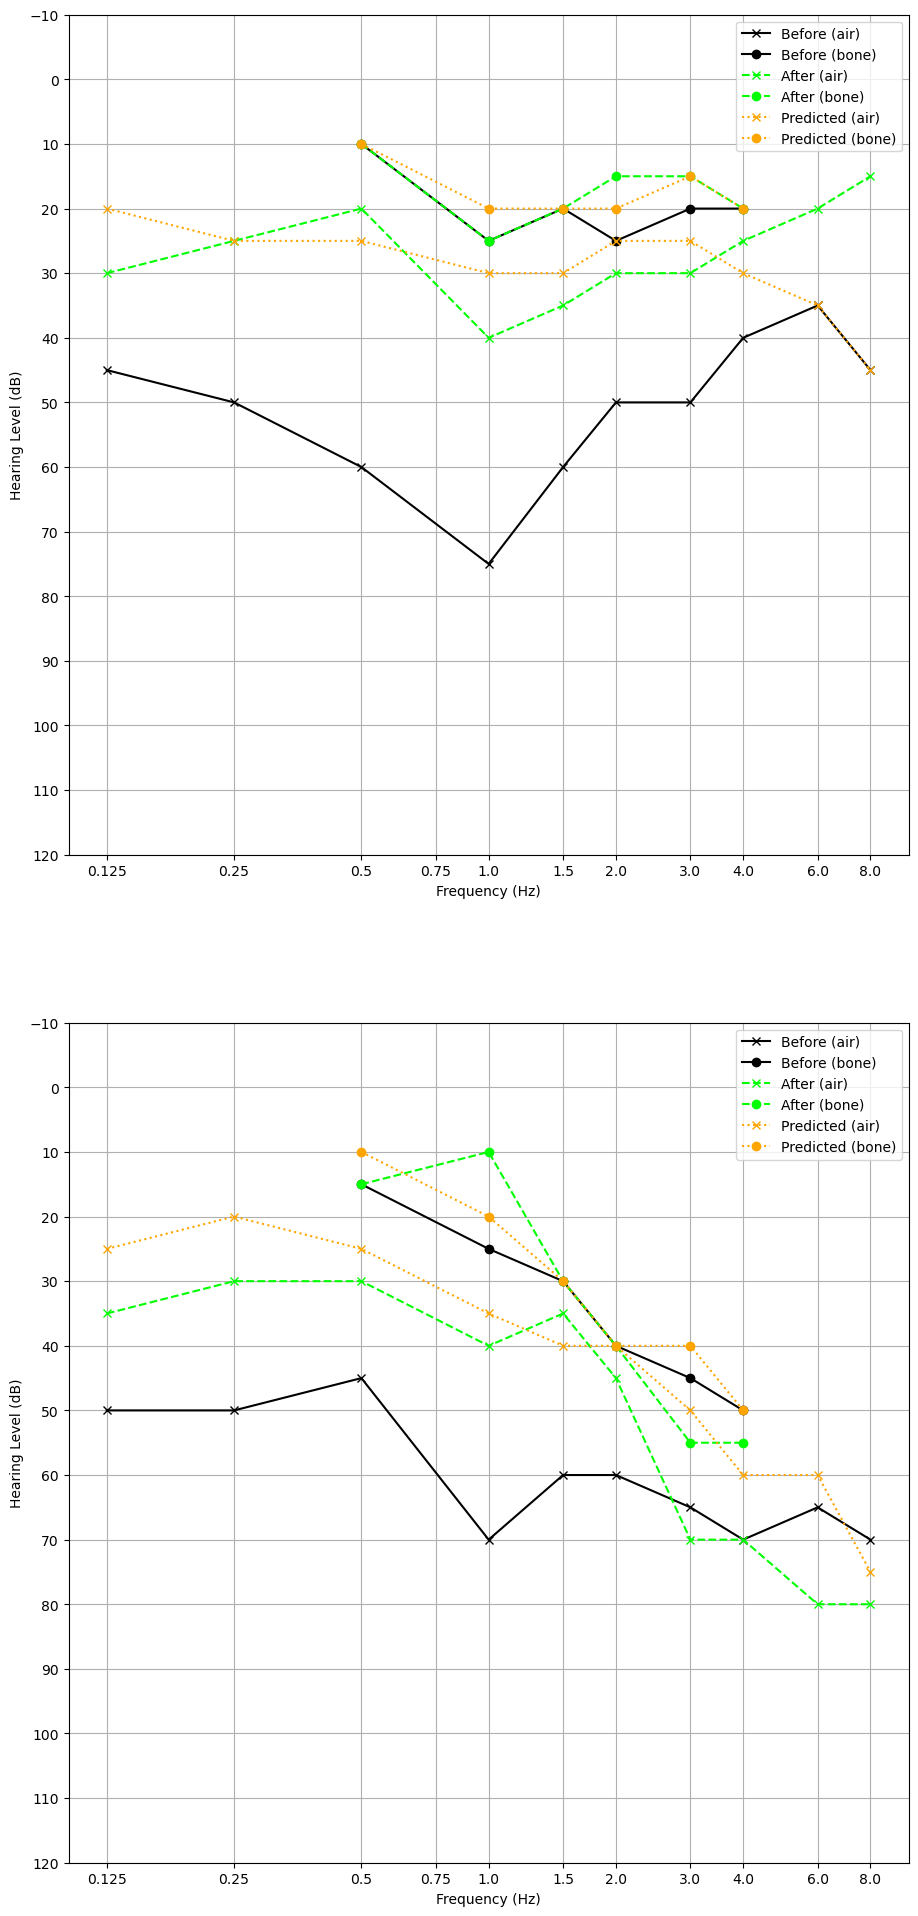

In [3]:
import pandas as pd
import funct 
import matplotlib.pyplot as plt
import numpy as np
import constants
import importlib

importlib.reload(constants)

# load data
orig_data = pd.read_csv('variables/processed.csv')
adg_data = pd.read_csv('variables/scaled.csv')
columns_list = funct.load_pickle('variables/class_columns')
best_models = funct.load_pickle('models/best_models')
ignore_filters = np.load('variables/ignore_filters')

# num of plots
n_rows = 2
start = 10 # start index

predicted = np.zeros((n_rows,16))

# make predictions for each class 
for i in range(16):
    tmp_data = adg_data[columns_list[i]]
    tmp_data = tmp_data.iloc[start:(start+n_rows),:]
    if(ignore_filters[i] == 1):
        tmp_predicted_data = funct.predict_and_round(best_models[i],adg_data.iloc[start:(start+n_rows),:constants.FEATURES_NUM])
    else:
        tmp_predicted_data = funct.predict_and_round(best_models[i],tmp_data)

    predicted[:,i] = tmp_predicted_data
# figure values
x_air = np.array([0.125, 0.25,0.5,1,1.5,2,3,4,6,8])
x_bone = np.array([0.5, 1,1.5,2,3,4])
y_grid = np.arange(-10,130,10)
print(y_grid)
x_grid = np.array([0.125, 0.25,0.5,0.75,1,1.5,2,3,4,6,8])
print(predicted)
fig, axs = plt.subplots(n_rows, 1,figsize=(24,24))
# plot predictions with ground truth (After) and feature values (Before)
for i in range(n_rows):
    axs[i].set_xscale('log') 
    axs[i].set_xticks(x_grid, minor=False)
    axs[i].xaxis.grid(True, which='major')
    axs[i].set_yticks(y_grid, minor=False)
    axs[i].yaxis.grid(True, which='major')
    axs[i].set_ylim(-10,120)
    axs[i].invert_yaxis()
    axs[i].set_xticklabels(x_grid)
    axs[i].minorticks_off()
    axs[i].set_box_aspect(1)
    axs[i].set_xlabel('Frequency (Hz)')
    axs[i].set_ylabel('Hearing Level (dB)')

    axs[i].plot(x_air, orig_data.iloc[start+i,constants.FQ_START_INDEX:constants.FQ_START_INDEX+10],color='black', marker='x',label='Before (air)')
    axs[i].plot(x_bone, orig_data.iloc[start+i,constants.FQ_START_INDEX+10:constants.FQ_START_INDEX+16],color='black', marker='o',label='Before (bone)')
    axs[i].plot(x_air, adg_data.iloc[start+i,constants.FEATURES_NUM:constants.FEATURES_NUM+10],color='lime', marker='x',label='After (air)',linestyle='dashed')
    axs[i].plot(x_bone, adg_data.iloc[start+i,constants.FEATURES_NUM+10:constants.FEATURES_NUM+16],color='lime', marker='o',label='After (bone)',linestyle='dashed')
    axs[i].plot(x_air, predicted[i,:10],color='orange', marker='x', label='Predicted (air)',linestyle='dotted')
    axs[i].plot(x_bone, predicted[i,10:],color='orange', marker='o', label='Predicted (bone)', linestyle='dotted')
    axs[i].legend(loc="upper right")




[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


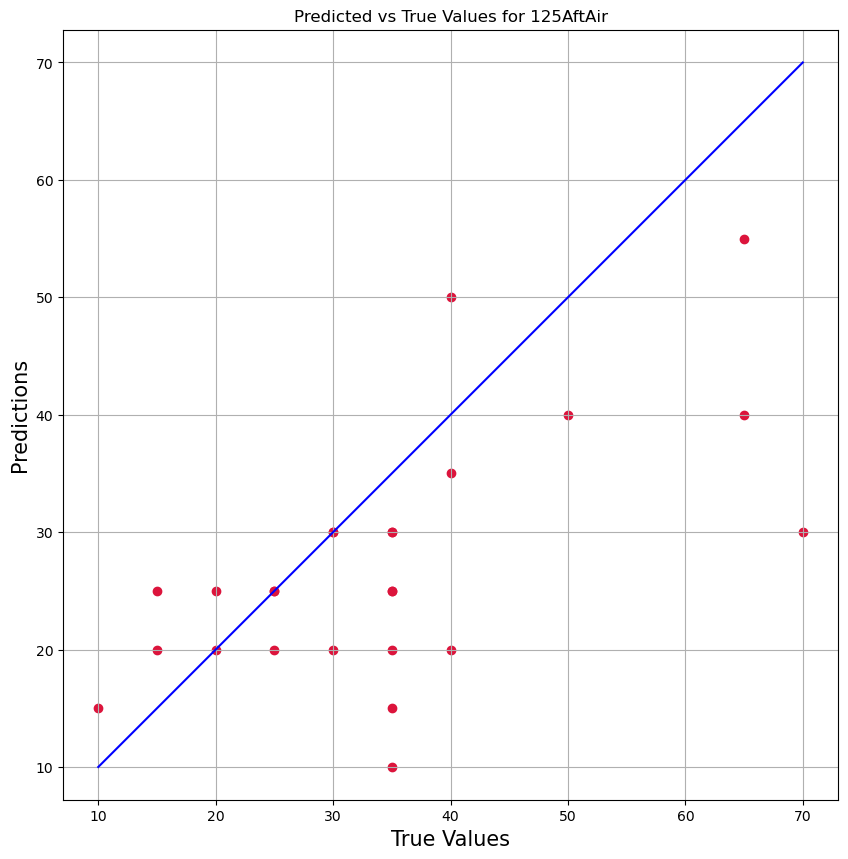

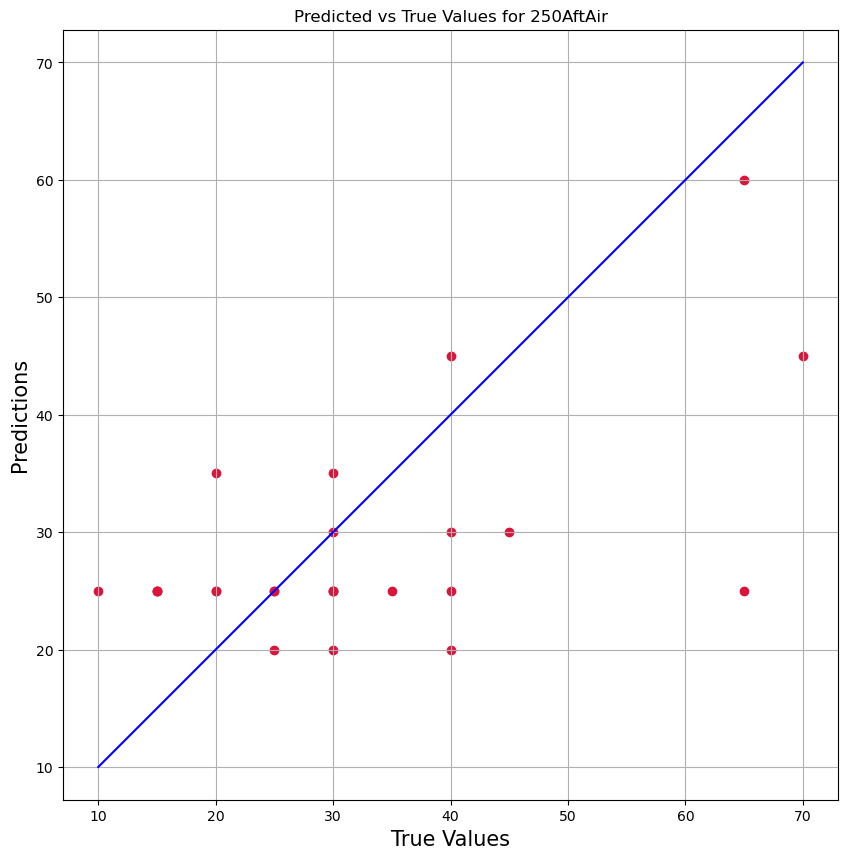

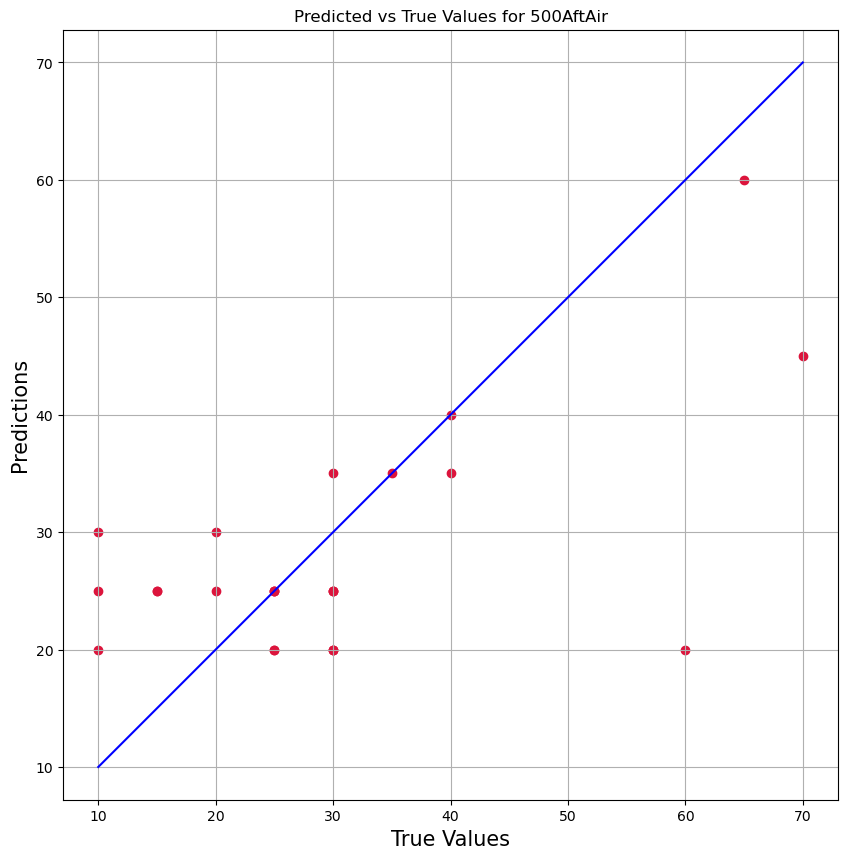

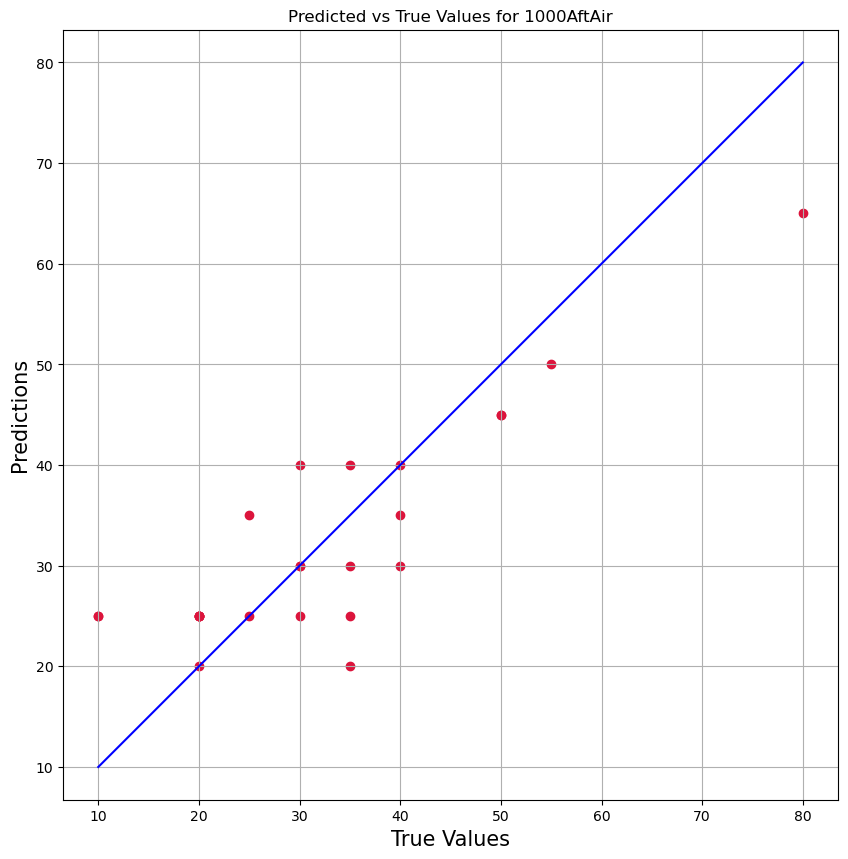

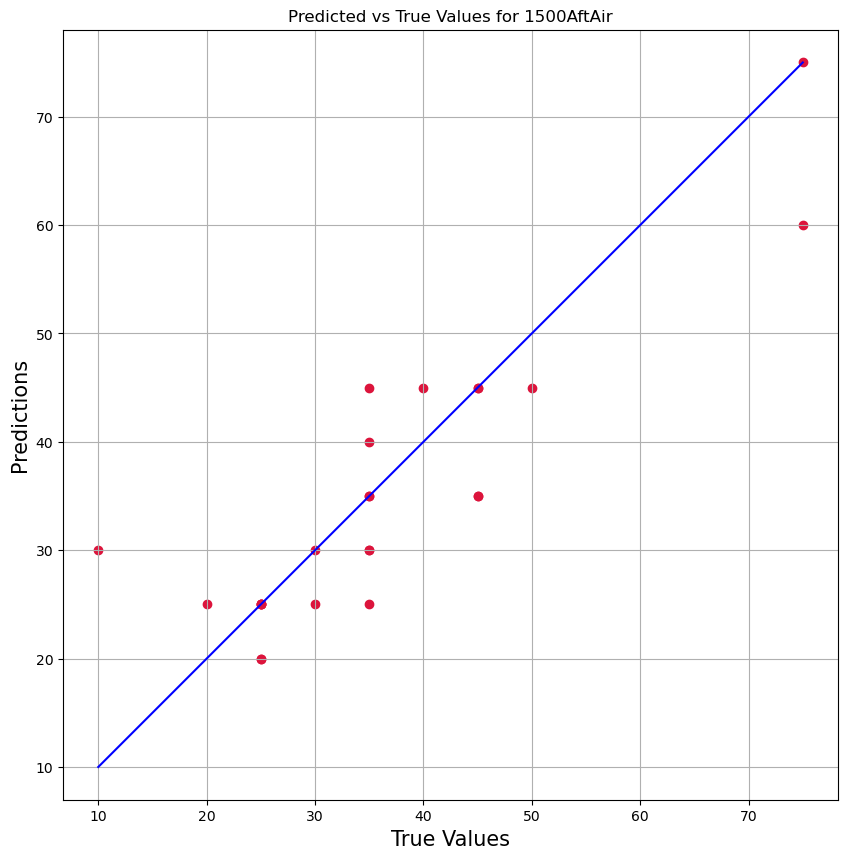

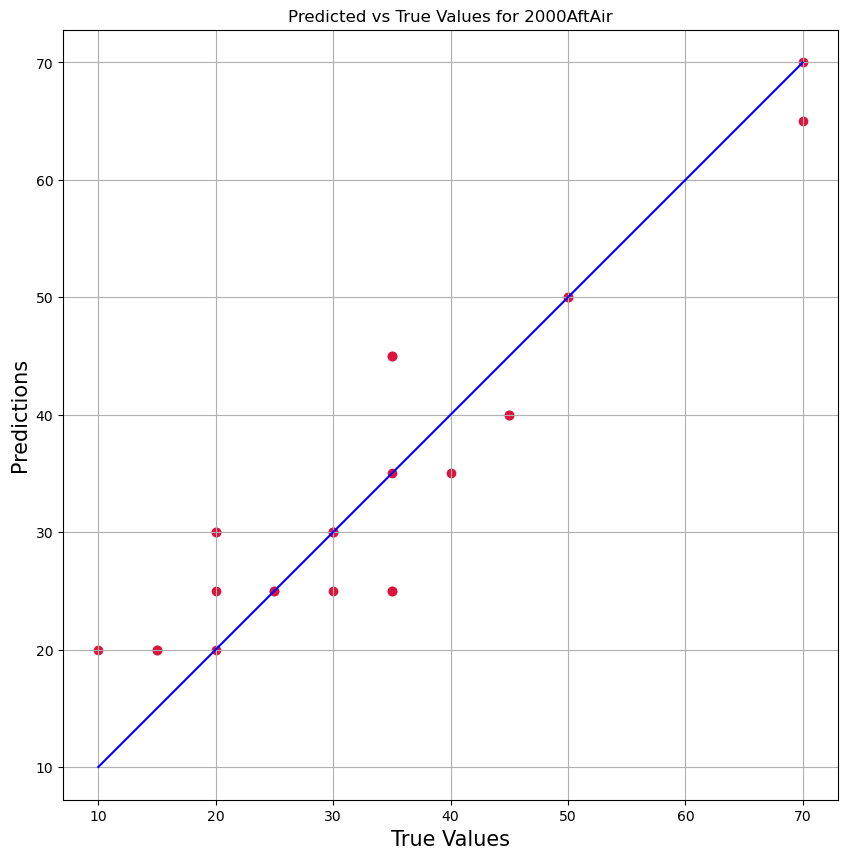

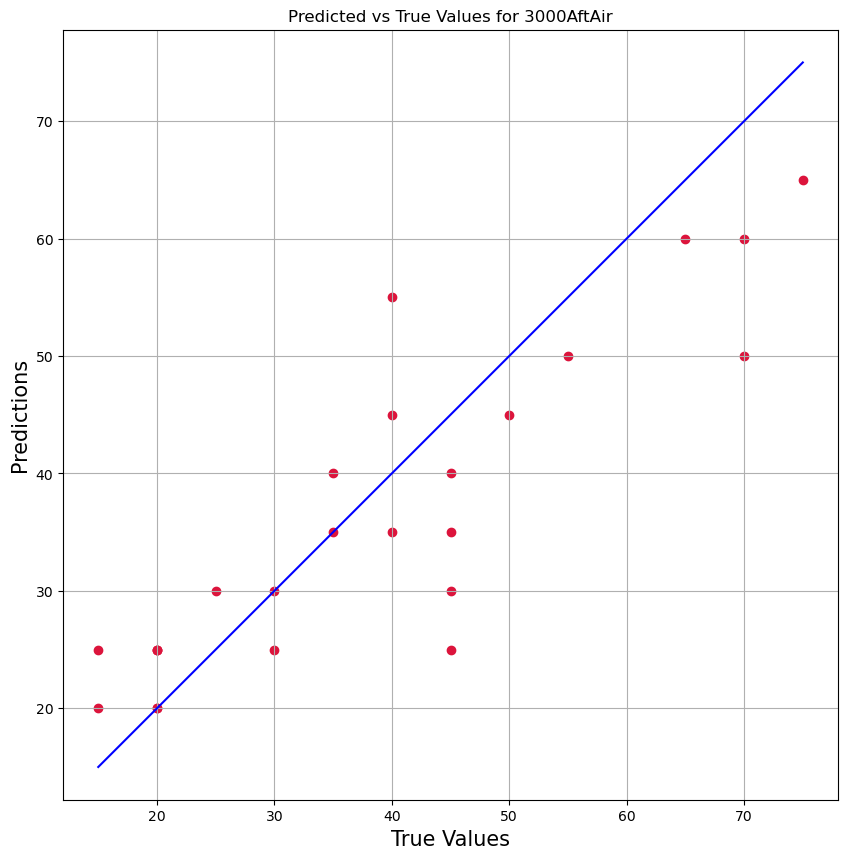

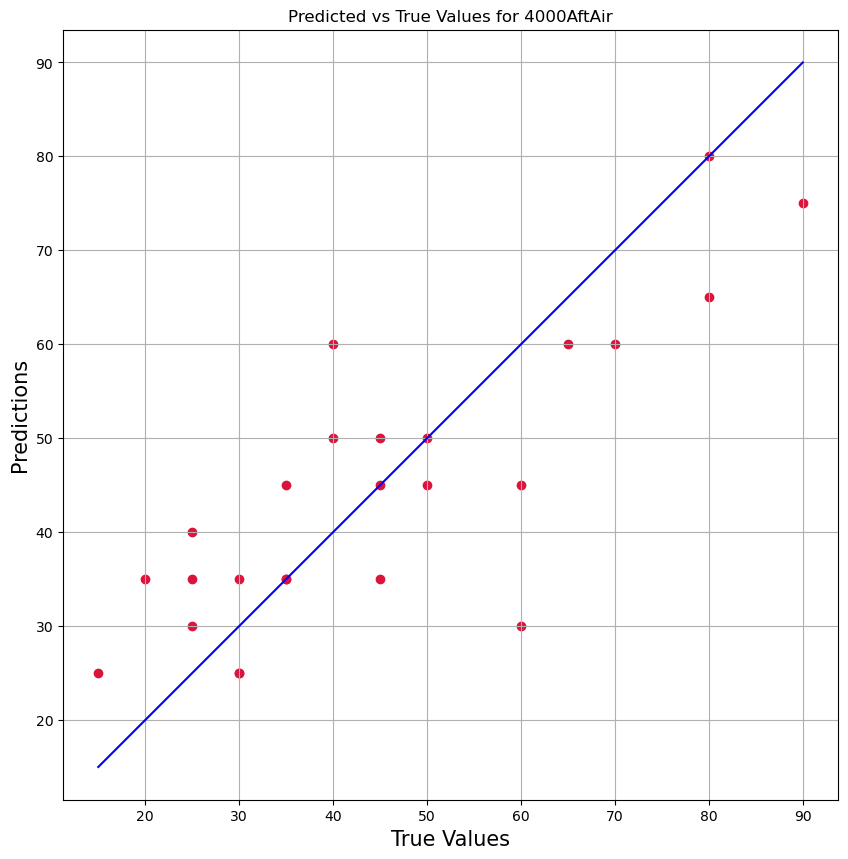

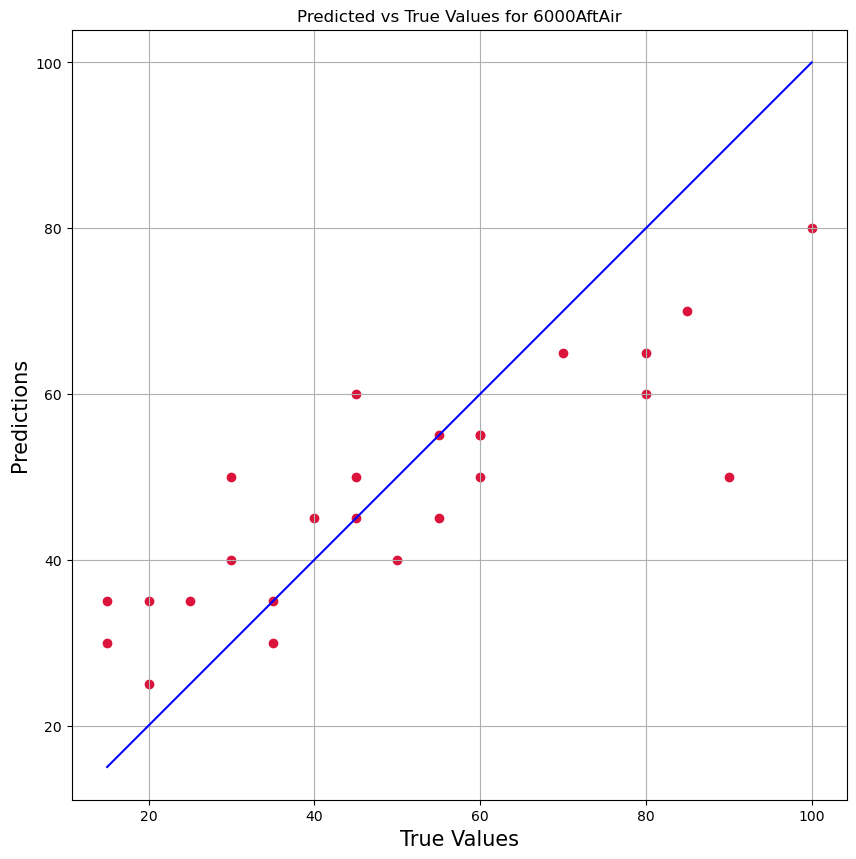

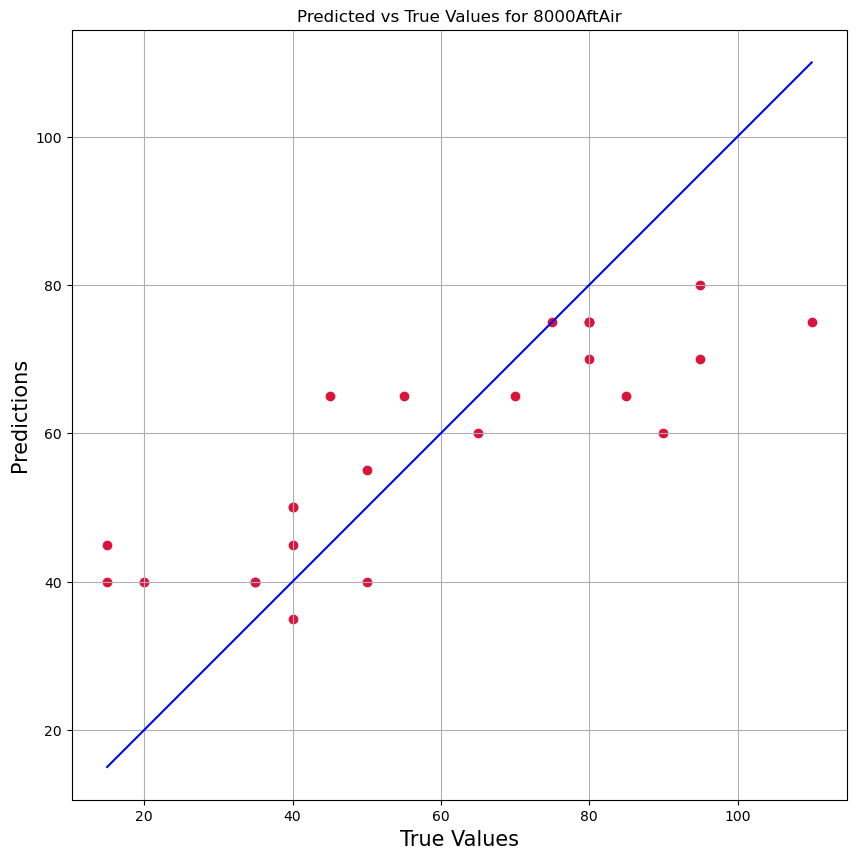

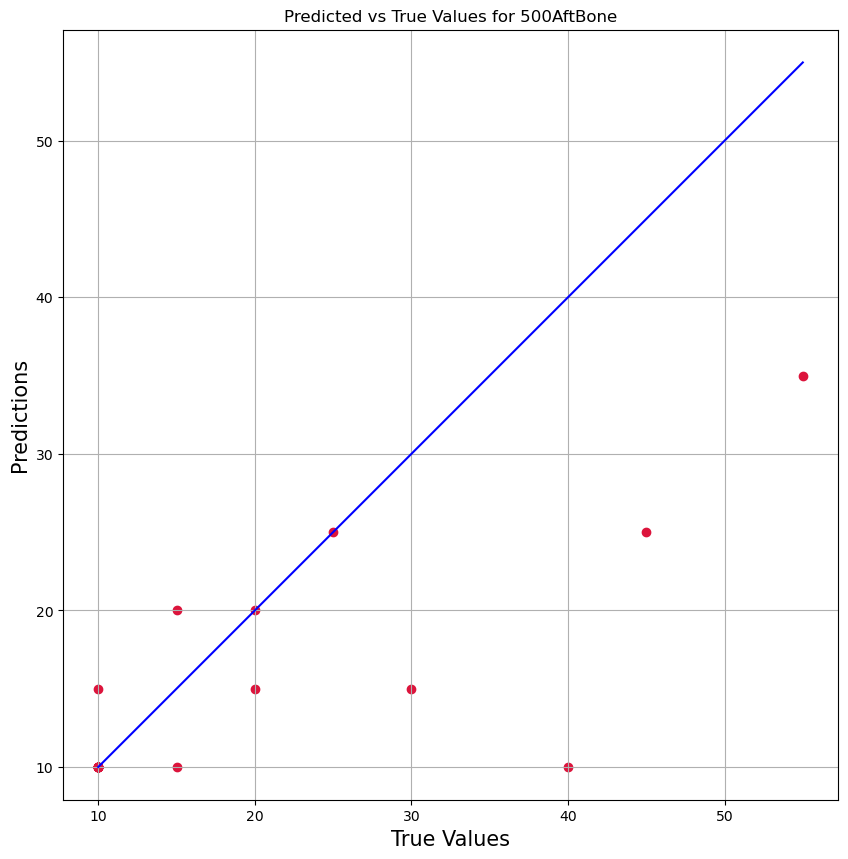

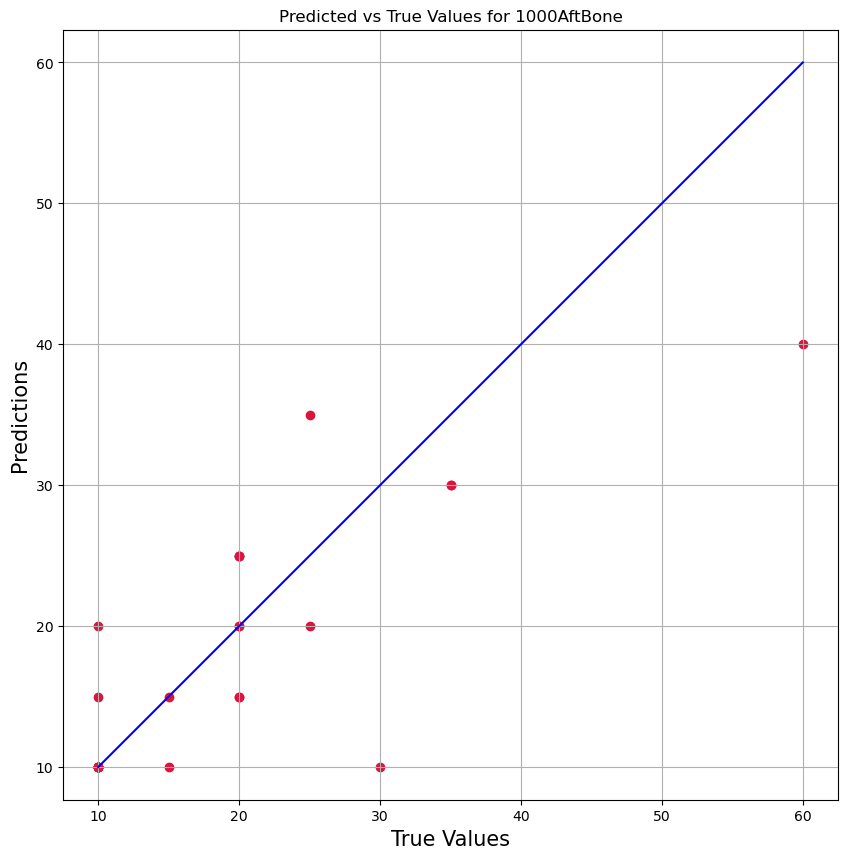

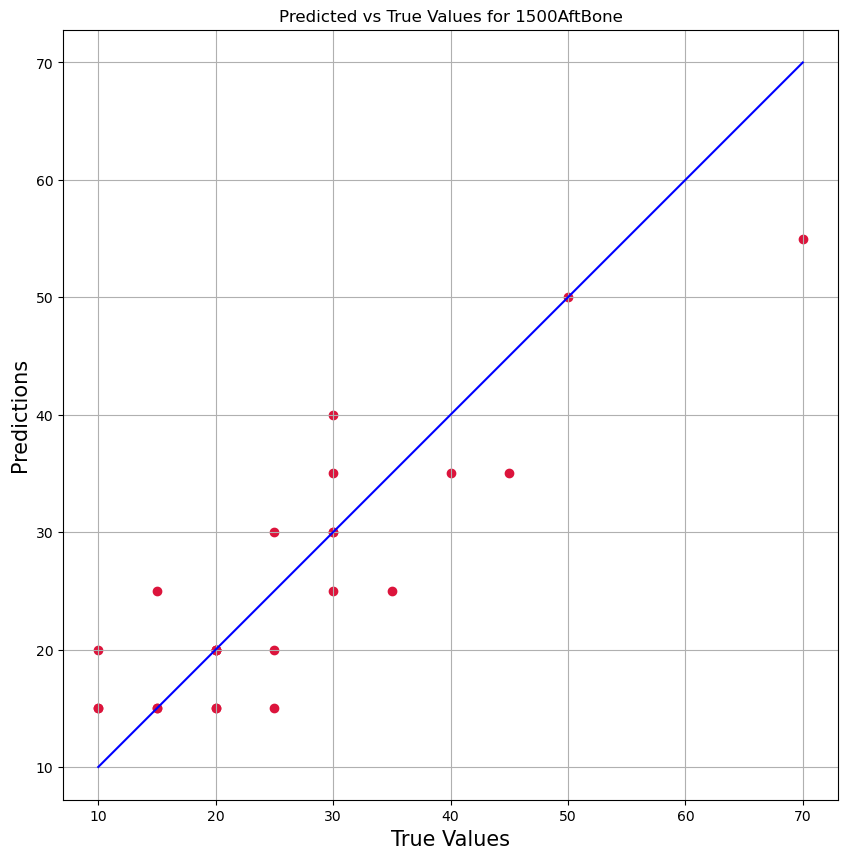

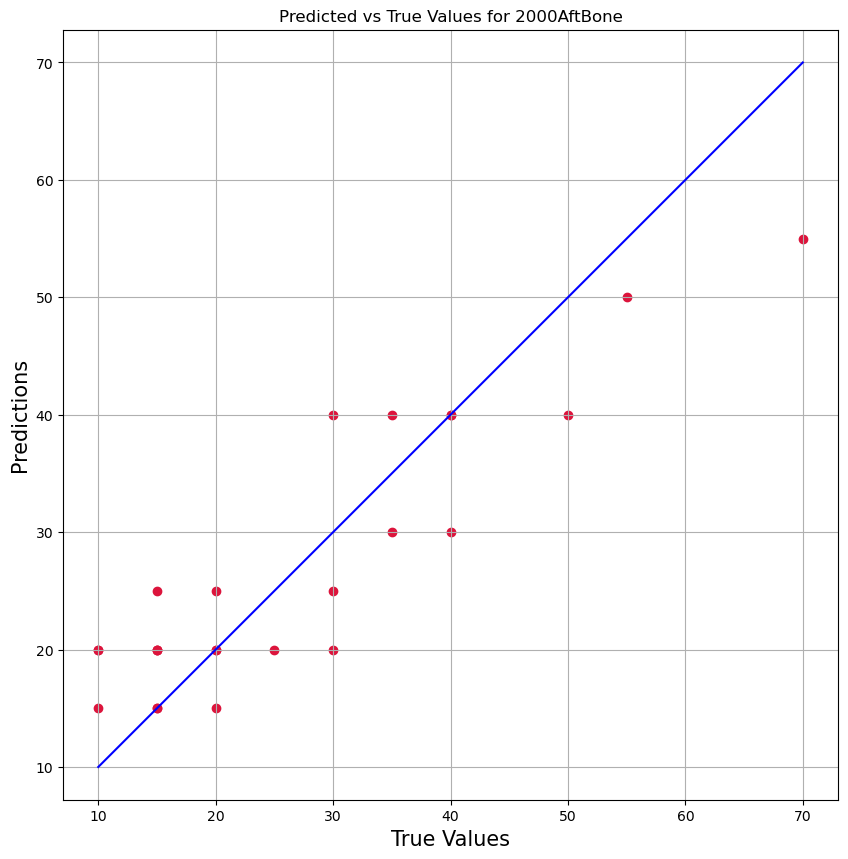

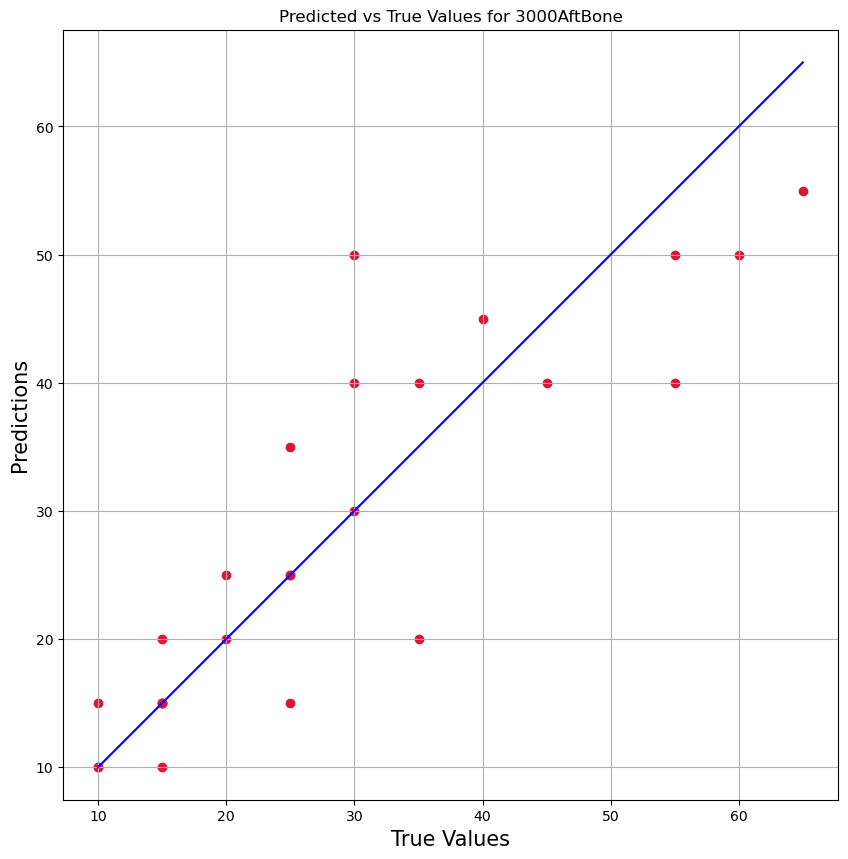

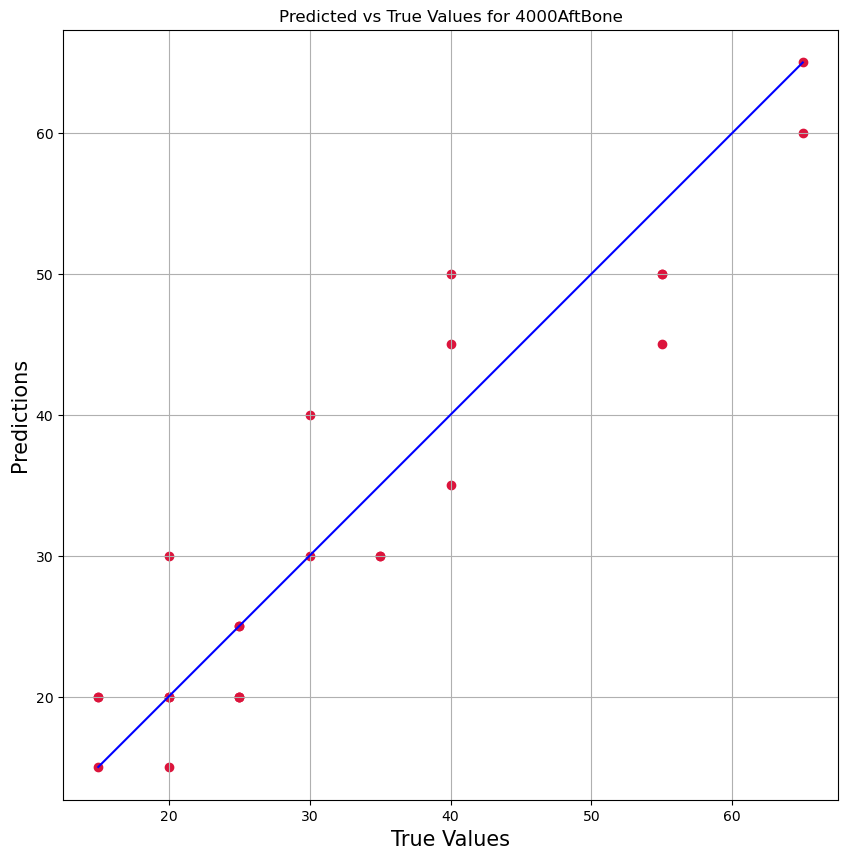

In [9]:
print(ignore_filters)

var_path = "variables/"

x_test = pd.read_csv(var_path + 'x_test.csv')
y_test = pd.read_csv(var_path + 'y_test.csv')

# plot adapted from https://stackoverflow.com/questions/58410187/how-to-plot-predicted-values-vs-the-true-value
for i in range(16):
    tmp_data = x_test[columns_list[i]]
    true_value = y_test.iloc[:,i]
    if(ignore_filters[i] == 1):
        tmp_predicted_data = funct.predict_and_round(best_models[i],x_test)
    else:
        tmp_predicted_data = funct.predict_and_round(best_models[i],tmp_data)


    plt.figure(figsize=(10,10))
    plt.scatter(true_value, tmp_predicted_data, c='crimson')

    p1 = max(max(tmp_predicted_data), max(true_value))
    p2 = min(min(tmp_predicted_data), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.grid()
    plt.title(f'Predicted vs True Values for {y_test.columns[i]}')
    plt.show()